In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd drive/

/content/drive


In [5]:
cd 'My Drive'

/content/drive/My Drive


In [6]:
cd 'Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [7]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data= pd.read_csv('train.csv')  #training data

test_data = pd.read_csv('test.csv')   #testing data

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24846 entries, 0 to 24845
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      24846 non-null  int64  
 1   V1      22459 non-null  float64
 2   V2      24846 non-null  float64
 3   V3      24846 non-null  float64
 4   V4      24846 non-null  float64
 5   V5      24846 non-null  float64
 6   V6      24846 non-null  float64
 7   V7      24846 non-null  float64
 8   V8      24846 non-null  float64
 9   V9      24846 non-null  float64
 10  V10     24846 non-null  float64
 11  V11     24846 non-null  float64
 12  V12     24846 non-null  float64
 13  V13     24846 non-null  float64
 14  V14     24846 non-null  float64
 15  V15     24846 non-null  float64
 16  V16     24846 non-null  float64
 17  V17     24846 non-null  float64
 18  V18     24846 non-null  float64
 19  V19     24846 non-null  float64
 20  V20     22317 non-null  float64
 21  V21     24846 non-null  float64
 22

In [0]:
data.describe()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
count,24846.000000,22459.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,22317.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000
mean,141868.788095,-0.042032,0.019074,-0.055260,0.029289,-0.031085,-0.008175,-0.026007,0.014152,-0.017939,-0.035149,0.024294,-0.049479,0.001362,-0.054444,0.002910,-0.042306,-0.056821,-0.014644,0.002778,0.003860,0.004708,0.006116,-0.004320,-0.005632,0.003193,0.001730,0.003160,-0.000100,91.698618,0.009820
std,82016.035976,2.061469,1.722647,1.730072,1.482053,1.616062,1.413044,1.620777,1.236557,1.140772,1.279021,1.099884,1.216934,0.992960,1.204090,0.917929,1.009002,1.184588,0.891371,0.825121,0.832891,0.753043,0.728869,0.622440,0.602507,0.518214,0.483415,0.455299,0.314326,310.349300,0.098613
min,32.000000,-37.054295,-39.818310,-48.325589,-5.231828,-113.743307,-19.996349,-37.060311,-39.688571,-11.126624,-23.228255,-4.568390,-18.683715,-3.844974,-19.214325,-4.498945,-14.129855,-25.162799,-9.287832,-4.395283,-54.497720,-21.620120,-8.887017,-23.222016,-2.759942,-4.930750,-1.658162,-7.976100,-15.430084,0.000000,0.000000
25%,70705.000000,-0.941997,-0.611444,-0.918977,-0.853705,-0.705745,-0.778707,-0.565469,-0.207270,-0.659425,-0.543054,-0.765464,-0.423463,-0.646768,-0.434402,-0.579738,-0.487703,-0.491669,-0.505933,-0.458749,-0.212758,-0.225318,-0.528751,-0.163086,-0.363609,-0.310198,-0.325839,-0.069698,-0.053829,5.470000,0.000000
50%,141887.000000,0.002750,0.068992,0.163070,-0.006193,-0.070299,-0.279575,0.032157,0.026507,-0.056063,-0.094353,-0.041019,0.137088,-0.005918,0.051674,0.053821,0.047246,-0.077799,-0.007094,0.003545,-0.060477,-0.026834,0.016988,-0.011396,0.036837,0.020346,-0.049872,0.001493,0.010855,21.990000,0.000000
75%,212513.500000,1.309469,0.825253,1.016704,0.759149,0.598372,0.402585,0.569205,0.335042,0.586035,0.454624,0.749140,0.621207,0.664828,0.485664,0.654127,0.510476,0.390588,0.497511,0.456741,0.137391,0.192690,0.533115,0.147343,0.433292,0.352613,0.241366,0.093725,0.079364,77.900000,0.000000
max,284781.000000,2.418267,19.167239,3.862590,15.304184,28.762671,73.301626,120.589494,19.587773,8.918202,15.331742,12.018913,4.242791,7.126883,7.439566,8.877742,17.315112,7.733456,4.093440,5.501747,17.819507,27.202839,8.272233,17.606637,4.584549,4.554683,3.415636,31.612198,15.522649,25691.160000,1.000000


In [0]:
data.head()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,138662,-0.711273,1.272483,1.681631,0.039897,-0.312381,-1.161083,0.853875,-0.173979,-0.438558,-0.053805,0.321036,0.814690,1.226450,-0.152389,0.687480,-0.030825,-0.284477,-0.696867,-0.227419,0.298008,-0.208181,-0.414631,0.057957,0.930321,-0.165598,0.038799,0.384295,0.192762,21.87,0
1,235999,1.990679,-0.128465,-1.700556,0.529839,0.136889,-1.404270,0.593353,-0.456700,0.648260,-0.071353,-0.982339,0.229658,-0.592959,0.574159,-0.263545,-0.780886,-0.066039,-0.575168,0.227544,-0.205092,0.018179,0.179084,-0.004248,0.039531,0.333765,-0.225201,-0.047285,-0.059682,49.99,0
2,245376,1.812653,-0.476162,-0.338988,1.386750,-0.745965,-0.449870,-0.492226,0.029904,1.129394,0.227346,-1.197477,-0.555129,-1.369130,0.320282,1.002745,0.501765,-0.670053,0.478236,-0.820942,-0.202894,0.252668,0.655719,0.090057,-0.136884,-0.172452,-0.556921,0.036490,-0.021575,79.00,0
3,202483,-1.014219,0.522775,-0.337978,-1.957797,3.578395,3.266965,0.602857,0.644645,-0.305879,-0.417906,0.010333,-0.299630,-0.379164,0.329193,0.957904,-0.417285,-0.705683,-0.063235,-0.381035,0.136061,0.147742,0.590740,-0.680551,0.745346,1.119496,0.013520,0.004530,-0.132643,6.00,0
4,9710,-0.967270,-0.053815,2.273463,-0.894434,0.728924,0.153524,-0.038330,0.165252,1.172526,-0.879114,2.505831,-2.249565,0.791677,1.546279,-0.133370,0.184501,0.307080,-0.081722,-1.359941,0.007512,0.106692,0.514430,-0.081546,-0.305042,-0.354883,0.896254,-0.182293,-0.142810,15.95,0


In [0]:
data= data.drop(['Id'], axis=1)

test_data_subset= test_data.drop(['Id'], axis=1)

Quantifying missing data

In [0]:
data.isnull().sum()

V1        2387
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20       2529
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
V29          0
Target       0
dtype: int64

Examining correlation between predictors and target variable- Target

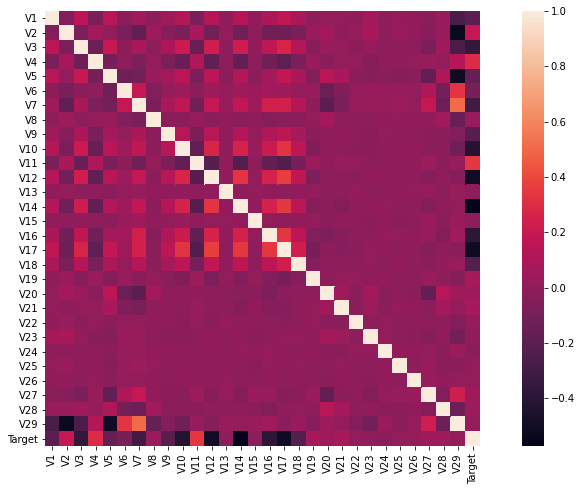

In [0]:
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), square=True, ax=ax
)

In [0]:
target_corr= data.corr()
target_corr['Target'].sort_values(ascending=False)

Target    1.000000
V11       0.341171
V4        0.295945
V2        0.185381
V21       0.077196
V19       0.076551
V27       0.047742
V20       0.044262
V28       0.035649
V8        0.033173
V29       0.011367
V26       0.011199
V22       0.008985
V25       0.006527
V23      -0.003234
V15      -0.008808
V13      -0.010334
V24      -0.020789
V6       -0.098290
V5       -0.156473
V1       -0.195578
V9       -0.209813
V18      -0.222202
V7       -0.297257
V3       -0.358543
V16      -0.385035
V10      -0.420856
V12      -0.501896
V17      -0.514565
V14      -0.572866
Name: Target, dtype: float64

In [10]:
continuous = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in ['Target']
]

print(f'There are {len(continuous)} continuous variables')


There are 29 continuous variables


In [11]:
test_continuous = [
    var for var in test_data_subset.columns if test_data_subset[var].dtype != 'O'
    if var not in ['Target']
]

print(f'There are {len(continuous)} continuous variables')

There are 29 continuous variables


Observing distributions of predictor variables

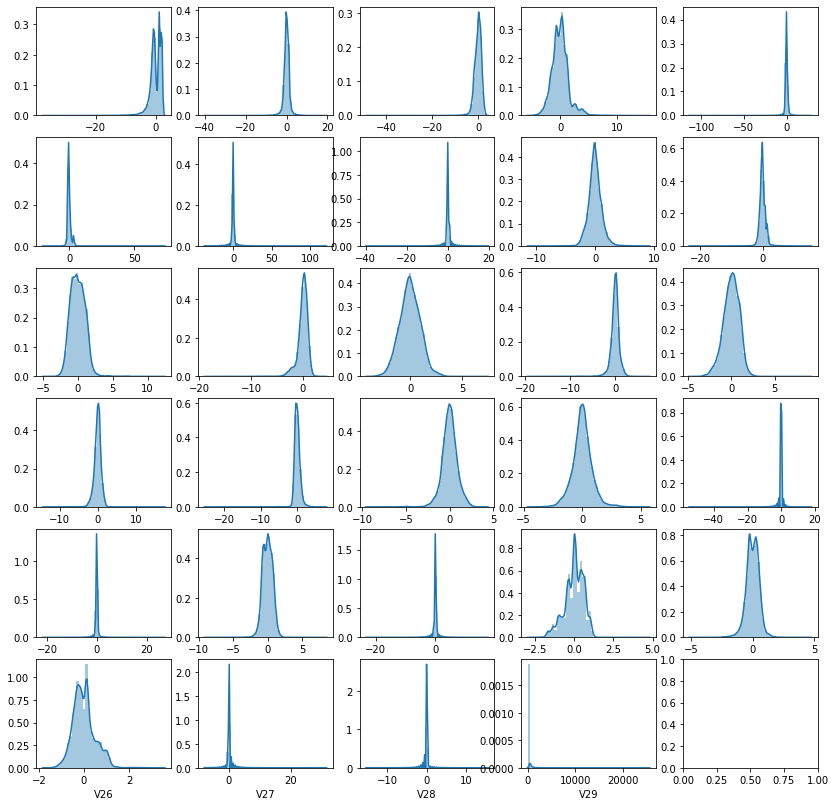

In [0]:
fig, axs = plt.subplots(ncols=5, nrows=6,figsize=(14,14))
axs = axs.flatten()

for i, var in enumerate(continuous):
    sns.distplot(data[data[var].notnull()][var], ax=axs[i]);

Plotting outliers using boxplot

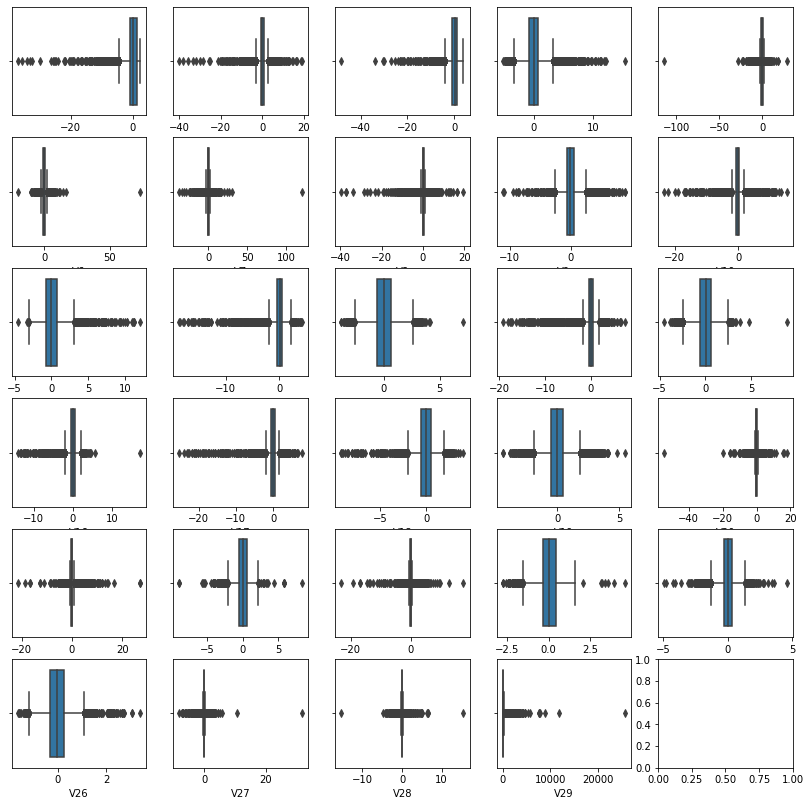

In [0]:
fig, axs = plt.subplots(ncols=5, nrows=6,figsize=(14,14))
axs = axs.flatten()

for i, var in enumerate(continuous):
    sns.boxplot(data[data[var].notnull()][var], ax=axs[i], orient='h');

Dividing into training and test sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Target'], axis=1),
                                                    data['Target'],
                                                    test_size=0.3,
                                                    random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17392, 29) (17392,)
(7454, 29) (7454,)


In [0]:
import warnings
warnings.filterwarnings('ignore')



Transforming predictors using the feature engineering pipeline

In [14]:
!pip install feature_engine

     |████████████████████████████████| 8.7MB 5.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [0]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine.variable_transformers import YeoJohnsonTransformer
from sklearn.preprocessing import StandardScaler

In [0]:
#pre-processing for training data

preprocess_pipeline = Pipeline([
    #missing data imputation
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='mean',
                                          variables=continuous)),

     #transforming predictors                           
    ('yjt', YeoJohnsonTransformer(variables = continuous)),
    
   
    # feature Scaling
    ('scaler', StandardScaler()),
    
    
])

In [18]:
preprocess_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['V1', 'V2', 'V3', 'V4', 'V5',
                                              'V6', 'V7', 'V8', 'V9', 'V10',
                                              'V11', 'V12', 'V13', 'V14', 'V15',
                                              'V16', 'V17', 'V18', 'V19', 'V20',
                                              'V21', 'V22', 'V23', 'V24', 'V25',
                                              'V26', 'V27', 'V28', 'V29'])),
                ('yjt',
                 YeoJohnsonTransformer(variables=['V1', 'V2', 'V3', 'V4', 'V5',
                                                  'V6', 'V7', 'V8', 'V9', 'V10',
                                                  'V11', 'V12', 'V13', 'V14',
                                                  'V15', 'V16', 'V17', 'V18',
                                                  'V19', 'V20', 'V21', 

In [0]:
# Apply Transformations for training data
X_train=preprocess_pipeline.transform(X_train)
X_test=preprocess_pipeline.transform(X_test)

In [0]:
#pre-processing for testing data

test_preprocess_pipeline = Pipeline([
    #missing data imputation
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='mean',
                                          variables=test_continuous)),

     #transforming predictors                           
    ('yjt', YeoJohnsonTransformer(variables = test_continuous)),
    
   
    # feature Scaling
    ('scaler', StandardScaler()),
    
    
])

In [21]:
test_preprocess_pipeline.fit(test_data_subset)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['V1', 'V2', 'V3', 'V4', 'V5',
                                              'V6', 'V7', 'V8', 'V9', 'V10',
                                              'V11', 'V12', 'V13', 'V14', 'V15',
                                              'V16', 'V17', 'V18', 'V19', 'V20',
                                              'V21', 'V22', 'V23', 'V24', 'V25',
                                              'V26', 'V27', 'V28', 'V29'])),
                ('yjt',
                 YeoJohnsonTransformer(variables=['V1', 'V2', 'V3', 'V4', 'V5',
                                                  'V6', 'V7', 'V8', 'V9', 'V10',
                                                  'V11', 'V12', 'V13', 'V14',
                                                  'V15', 'V16', 'V17', 'V18',
                                                  'V19', 'V20', 'V21', 

In [0]:
# Apply Transformations for testing data
test_data_subset = test_preprocess_pipeline.transform(test_data_subset)

**Basic Algorithms**

Performance of train and test sets is measured using the F2-score

Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

log_param = {
    
    'tol':[0.0001, 0.001, 0.01],
    'C':[0.01,0.1,0,1.0]
}

clf = GridSearchCV(LogisticRegression(), log_param, scoring=ftwo_scorer, return_train_score = True)

clf.fit(X_train, y_train)

y_pred_log= clf.predict(X_test)

print('Best parameters: ', clf.best_params_)

print("Best Mean cross-validation score: {:.2f}".format(clf.best_score_))

# Check data set performance
print("Logistic Train Performance: ", clf.score(X_train,y_train))
print("Logistic Test Performance: ", clf.score(X_test,y_test))



Best parameters:  {'C': 0.1, 'tol': 0.0001}
Best Mean cross-validation score: 0.82
Logistic Train Performance:  0.8353365384615387
Logistic Test Performance:  0.7971014492753623


Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

#define a list of parameters
param_dtree = {'max_depth': range(1,6)}

#apply grid search
grid_dtree = GridSearchCV(DecisionTreeClassifier(), param_dtree, scoring=ftwo_scorer, return_train_score = True)
grid_dtree.fit(X_train, y_train)

y_pred_tree= grid_dtree.predict(X_test)

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

print("Best Mean cross-validation score: {:.2f}".format(grid_dtree.best_score_))

# Check test data set performance
print("Train Performance: ", grid_dtree.score(X_train,y_train))
print("Test Performance: ", grid_dtree.score(X_test,y_test))



Decision Tree parameters:  {'max_depth': 2}
Best Mean cross-validation score: 0.85
Train Performance:  0.8610451306413303
Test Performance:  0.8333333333333333


KNN Classifier

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

knn = KNeighborsClassifier()

# define a list of parameters
param_knn = {'n_neighbors': [5,7,9]}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, scoring=ftwo_scorer , return_train_score=True)
grid_knn.fit(X_train, y_train)

y_pred= grid_knn.predict(X_test)

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

print("Best Mean cross-validation score: {:.2f}".format(grid_knn.best_score_))

# Check test data set performance
print("KNN Train Performance: ", grid_knn.score(X_train,y_train))
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))


KNN parameters:  {'n_neighbors': 5}
Best Mean cross-validation score: 0.82
KNN Train Performance:  0.8422939068100358
KNN Test Performance:  0.782608695652174


Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

rf_parameters= {'max_leaf_nodes':[4,8,16],
                'max_features':[0.5,0.7,1.0]}

rf = RandomForestClassifier(random_state=0)
rfGridSearch= GridSearchCV(rf, rf_parameters, scoring=ftwo_scorer, return_train_score=True)

rfGridSearch.fit(X_train, y_train)

y_pred_rf= rfGridSearch.predict(X_test)

#find best parameters
print('Random Forest Test Performance parameters: ', rfGridSearch.best_params_)

print("Best Mean cross-validation score: {:.2f}".format(rfGridSearch.best_score_))

# Check test data set performance
print("Random Forest Train Performance: ", rfGridSearch.score(X_train, y_train) )
print("Random Forest Test Performance: ", rfGridSearch.score(X_test,y_test))

Random Forest Test Performance parameters:  {'max_features': 1.0, 'max_leaf_nodes': 4}
Best Mean cross-validation score: 0.86
Random Forest Train Performance:  0.8630952380952382
Random Forest Test Performance:  0.8189655172413792


Extra Trees Classifier

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer, fbeta_score

ftwo_scorer = make_scorer(fbeta_score, beta=2)

EXT_parameters= {'n_estimators':[100,500],
                  'max_depth':[6,7,8,9],
                 'max_features':[0.5,0.7,1.0]}

EXTGridSearch= GridSearchCV( ExtraTreesClassifier(random_state=0), EXT_parameters, scoring=ftwo_scorer, return_train_score=True)

EXTGridSearch.fit(X_train, y_train)

#predicting class label
y_pred_ext= EXTGridSearch.predict(X_test)

#find best parameters
print('Extra Trees Test Performance parameters: ', EXTGridSearch.best_params_)

print("Best Mean cross-validation score: {:.2f}".format(EXTGridSearch.best_score_))

# Check test data set performance

print("Extra Trees Train Performance: ", EXTGridSearch.score(X_train, y_train) )
print("Extra Trees Test Performance: ", EXTGridSearch.score(X_test,y_test))

Extra Trees Test Performance parameters:  {'max_depth': 9, 'max_features': 1.0, 'n_estimators': 500}
Best Mean cross-validation score: 0.85
Extra Trees Train Performance:  0.8900836320191159
Extra Trees Test Performance:  0.8333333333333333


Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

ftwo_scorer = make_scorer(fbeta_score, beta=2) 


GB_parameters= {
                  'max_depth':[3,4,5],
                  'learning_rate':[0.1,1.0],
                  'n_estimators':[100,500]
                  
                }

GB_gridSearch= GridSearchCV(GradientBoostingClassifier(min_samples_split=10,random_state=42),GB_parameters, scoring=ftwo_scorer, return_train_score=True)

GB_gridSearch.fit(X_train, y_train)

y_pred_GB= GB_gridSearch.predict(X_test)

#find best parameters
print('Gradient Boosting Test Performance parameters: ', GB_gridSearch.best_params_)

# Check test data set performance

print("Gradient Boosting Train Performance: ", GB_gridSearch.score(X_train, y_train) )
print("Gradient Boosting Test Performance: ", GB_gridSearch.score(X_test,y_test))


Gradient Boosting Test Performance parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Gradient Boosting Train Performance:  1.0
Gradient Boosting Test Performance:  0.7060518731988474


XGBoost

In [47]:
!pip install xgboost

In [48]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer, fbeta_score

ftwo_scorer = make_scorer(fbeta_score, beta=2)

xgb_parameters= {'learning_rate':[0.1,1,10],
                 'max_depth':[3,4,5],
                 'gamma':[0,0.1,1.0],
                 'alpha':[0,0.1,1.0],
                 'lambda':[0,1,10,100]}

xgbGridSearch= GridSearchCV( XGBClassifier(random_state=0, n_jobs=1), xgb_parameters, scoring=ftwo_scorer, return_train_score=True)

xgbGridSearch.fit(X_train,y_train)

#predicting class label
y_pred_xgb= xgbGridSearch.predict(X_test)

#find best parameters
print('XGB Test Performance parameters: ', xgbGridSearch.best_params_)

# Check test data set performance
print("XGB Train Performance: ", xgbGridSearch.score(X_train, y_train) )
print("XGB Test Performance: ", xgbGridSearch.score(X_test,y_test))

XGB Test Performance parameters:  {'alpha': 0, 'gamma': 0, 'lambda': 0, 'learning_rate': 1, 'max_depth': 4}
XGB Train Performance:  1.0
XGB Test Performance:  0.7971014492753623


**Cost Sensitive Algorithms**

Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

logparam = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
}

logclf = GridSearchCV(LogisticRegression(C=0.1, tol=0.0001), logparam, scoring=ftwo_scorer, return_train_score = True)

logclf.fit(X_train, y_train)

y_pred_logistic= logclf.predict(X_test)

print('Best parameters: ', logclf.best_params_)

print("Best Mean cross-validation score: {:.2f}".format(logclf.best_score_))

# Check data set performance
print("Logistic Train Performance: ", logclf.score(X_train,y_train))
print("Logistic Test Performance: ", logclf.score(X_test,y_test))



Best parameters:  {'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.84
Logistic Train Performance:  0.8428246013667425
Logistic Test Performance:  0.8055555555555556


Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

#define a list of parameters
param_tree ={  'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
gridS_dtree = GridSearchCV(DecisionTreeClassifier(max_depth=2), param_tree, scoring=ftwo_scorer, return_train_score = True)
gridS_dtree.fit(X_train, y_train)

y_pred_dtree= gridS_dtree.predict(X_test)

#find best parameters
print('Decision Tree parameters: ', gridS_dtree.best_params_)

print("Best Mean cross-validation score: {:.2f}".format(gridS_dtree.best_score_))

# Check test data set performance
print("Train Performance: ", gridS_dtree.score(X_train,y_train))
print("Test Performance: ", gridS_dtree.score(X_test,y_test))



Decision Tree parameters:  {'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.86
Train Performance:  0.8685446009389671
Test Performance:  0.830945558739255


KNN Classifier

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

# define a list of parameters
param_knn = {'n_neighbors': [7,9,11]}

#apply grid search
knn = GridSearchCV(KNeighborsClassifier(weights='distance'), param_knn, scoring=ftwo_scorer , return_train_score=True)
knn.fit(X_train, y_train)

y_pred_knn= knn.predict(X_test)

#find best parameters
print('KNN parameters: ', knn.best_params_)
print("Best Mean cross-validation score: {:.2f}".format(knn.best_score_))
# Check test set performance
print("KNN Train Performance: ", knn.score(X_train,y_train))
print("KNN Test Performance: ", knn.score(X_test,y_test))


KNN parameters:  {'n_neighbors': 9}
Best Mean cross-validation score: 0.82
KNN Train Performance:  1.0
KNN Test Performance:  0.7971014492753623


Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

rf_parameters={'max_depth':[2,3,4,5],
               'min_samples_split':[50,100,300]}

rndf= GridSearchCV(RandomForestClassifier(class_weight='balanced',random_state=0), rf_parameters, scoring=ftwo_scorer, return_train_score=True)

rndf.fit(X_train, y_train)

y_pred_rndf= rndf.predict(X_test)

#find best parameters
print('Random Forest Test Performance parameters: ', rndf.best_params_)

# Check data set performance
print("Best Mean cross-validation score: {:.2f}".format(rndf.best_score_))
print("Random Forest Train Performance: ", rndf.score(X_train, y_train) )
print("Random Forest Test Performance: ", rndf.score(X_test,y_test))

Random Forest Test Performance parameters:  {'max_depth': 5, 'min_samples_split': 50}
Best Mean cross-validation score: 0.85
Random Forest Train Performance:  0.9184845005740527
Random Forest Test Performance:  0.8240223463687151


Extra Trees Classifier

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer, fbeta_score

ftwo_scorer = make_scorer(fbeta_score, beta=2)

EXTparameters= {'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
                  'min_samples_split':[20,30,40,50]}

EXT= GridSearchCV( ExtraTreesClassifier(max_depth=9,n_estimators=500,random_state=0), EXTparameters, scoring=ftwo_scorer, return_train_score=True)

EXT.fit(X_train, y_train)

#predicting class label
y_pred_EXT= EXT.predict(X_test)

#find best parameters
print('Extra Trees Test Performance parameters: ', EXT.best_params_)

# Check test data set performance
print("Best Mean cross-validation score: {:.2f}".format(EXT.best_score_))
print("Extra Trees Train Performance: ", EXT.score(X_train, y_train) )
print("Extra Trees Test Performance: ", EXT.score(X_test,y_test))

Extra Trees Test Performance parameters:  {'class_weight': {0: 1, 1: 100}, 'min_samples_split': 20}
Best Mean cross-validation score: 0.87
Extra Trees Train Performance:  0.919674039580908
Extra Trees Test Performance:  0.8380681818181818


Gradient Boosting with XGBoost

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

ftwo_scorer= make_scorer(fbeta_score, beta=2)

xgboost = XGBClassifier(early_stopping_rounds=5, learning_rate=0.1)
param_grid = {
    
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}

#apply grid search
grid_xgboost= GridSearchCV(xgboost, param_grid, cv=5, n_jobs=-1, scoring=ftwo_scorer)
grid_xgboost.fit(X_train, y_train)

print("Best parameters: {}".format(grid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_xgboost.best_score_))
print("Extra Trees Train Performance: ", grid_xgboost.score(X_train, y_train) )
print("Extra Trees Test Performance: ", grid_xgboost.score(X_test,y_test))

Best parameters: {'scale_pos_weight': 10}
Best Mean cross-validation score: 0.85
Extra Trees Train Performance:  0.9907834101382487
Extra Trees Test Performance:  0.8285714285714285


Bagging Decision Tree with undersampling

In [44]:
!pip install imblearn

In [24]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [45]:
import statistics
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, fbeta_score

ftwo_scorer = make_scorer(fbeta_score, beta=2)

model= BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),sampling_strategy='not majority')

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)
final_score= statistics.mean(scores)

model.fit(X_train, y_train)

y_pred_model= model.predict(X_test)

print('Mean cross validation score:',final_score)
print('Test performance:', accuracy_score(y_test, y_pred_model))
print('F2-score: ', fbeta_score(y_test,y_pred_model,beta=2))


Mean cross validation score: 0.8359477022615571
Test performance: 0.9975851891601825
F2-score:  0.8092485549132947


**Data Sampling Algorithms**

Logistic Regression

In [58]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer= make_scorer(fbeta_score, beta=2)

pipe_log = Pipeline([('smote',SMOTE()),('log_reg',LogisticRegression(C=0.1, tol=0.0001))])
parameters_pipe_log = {'smote__k_neighbors': [1,2,3,4,5]}

DS_log= GridSearchCV(pipe_log,parameters_pipe_log, cv=10, n_jobs=2, scoring=ftwo_scorer)
DS_log.fit(X_train, y_train)

y_log= DS_log.predict(X_test)

print("Best parameters: {}".format(DS_log.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DS_log.best_score_))
print("F2-score: ", fbeta_score(y_test, y_log, beta=2))

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.59
F2-score:  0.5809523809523809


Decision Tree Classifier

In [57]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer= make_scorer(fbeta_score, beta=2)

#decisiontreee
pipe_dtree = Pipeline([('smote',SMOTE()),('dtree',DecisionTreeClassifier(max_depth=2))])
parameters_dtree = {'smote__k_neighbors': [1,2,3,4,5]}

DSgrid_dtree= GridSearchCV(pipe_dtree,parameters_dtree, cv=10, n_jobs=2, scoring=ftwo_scorer)
DSgrid_dtree.fit(X_train, y_train)

y_dtree = DSgrid_dtree.predict(X_test)

print("Best parameters: {}".format(DSgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DSgrid_dtree.best_score_))
print("F2-score: ", fbeta_score(y_test, y_dtree, beta=2))

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.62
F2-score:  0.5621301775147929


KNN Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer= make_scorer(fbeta_score, beta=2)

pipe_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=9))])
parameters_knn = {'smote__k_neighbors': [1,2,3,4,5]}

DSgrid_knn= GridSearchCV(pipe_knn,parameters_knn, cv=10, n_jobs=2, scoring=ftwo_scorer)
DSgrid_knn.fit(X_train, y_train)

y_knn= DSgrid_knn.predict(X_test)

print("Best parameters: {}".format(DSgrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DSgrid_knn.best_score_))
print("F2-score: ", fbeta_score(y_test, y_knn, beta=2))

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.78
F2-score:  0.7475490196078431


Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer= make_scorer(fbeta_score, beta=2)

pipe_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(max_leaf_nodes=4))])
parameters_rf = {'smote__k_neighbors': [1,2,3,4,5]}

DSgrid_rf= GridSearchCV(pipe_rf,parameters_rf, cv=10, n_jobs=2, scoring=ftwo_scorer)
DSgrid_rf.fit(X_train, y_train)

y_rf= DSgrid_rf.predict(X_test)

print("Best parameters: {}".format(DSgrid_rf.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DSgrid_rf.best_score_))
print("F2-score: ", fbeta_score(y_test, y_rf, beta=2))

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.80
F2-score:  0.7230392156862744


XGBoost

In [42]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer= make_scorer(fbeta_score, beta=2)

pipe_xgb = Pipeline([('smote',SMOTE()),('xgb',XGBClassifier())])
parameters_xgb = {'smote__k_neighbors': [1,2,3,4,5]}

DSgrid_xgb= GridSearchCV(pipe_xgb,parameters_xgb, cv=10, n_jobs=2, scoring=ftwo_scorer)
DSgrid_xgb.fit(X_train, y_train)

y_xgb= DSgrid_xgb.predict(X_test)

print("Best parameters: {}".format(DSgrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DSgrid_xgb.best_score_))
print("F2-score: ", fbeta_score(y_test, y_xgb, beta=2))

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.84
F2-score:  0.8051948051948052


Easy Ensemble Classifier

In [69]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer= make_scorer(fbeta_score, beta=2)

parameters_E ={
    
    'n_estimators':[100,500,1000]
}

EasyE= GridSearchCV(EasyEnsembleClassifier(sampling_strategy='all'),parameters_E, cv=5, n_jobs=-1, scoring=ftwo_scorer)
EasyE.fit(X_train, y_train)

y_EasyE= EasyE.predict(X_test)

print("Best parameters: {}".format(EasyE.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(EasyE.best_score_))
print("F2-score: ", fbeta_score(y_test, y_EasyE, beta=2))


Best parameters: {'n_estimators': 1000}
Best Mean cross-validation score: 0.59
F2-score:  0.61787072243346


MLP Classifier

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer= make_scorer(fbeta_score, beta=2)

parameters_MLP ={
    
    'max_iter':[100, 250, 500],
    'alpha':[0.0001,0.001,0.01,0.1],
    'hidden_layer_sizes':np.arange(5,13)
}

MLP= GridSearchCV(MLPClassifier(),parameters_MLP, cv=10, n_jobs=-1, scoring=ftwo_scorer)
MLP.fit(X_train, y_train)

y_MLP= MLP.predict(X_test)

print("Best parameters: {}".format(MLP.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(MLP.best_score_))
print("Training score: ", MLP.score(X_train, y_train))
print("Testing score: ", MLP.score(X_test, y_test))
print("F2-score: ", fbeta_score(y_test, y_MLP, beta=2))

Best parameters: {'alpha': 0.1, 'hidden_layer_sizes': 6, 'max_iter': 500}
Best Mean cross-validation score: 0.85
Training score:  0.844311377245509
Testing score:  0.8069164265129682
F2-score:  0.8069164265129682


Voting Classifier based on top 5 models ranked by best mean cross validation score, calculated using F2 score-

1.  Cost Sensitive Extra Trees Classifier (0.87)
2.  Cost Sensitive Random Forest Classifier (0.86)
3.  Cost Sensitive Decision Tree Classifier (0.86)
4.  Cost Sensitive XGBoost (0.85)
5.  Decision Tree Classifier(0.85)

In [38]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('CS XG Boost', grid_xgboost), 
                                          ('CS Extra Trees', EXT), 
                                          ('CS Decision Tree', gridS_dtree),
                                          ('CS Random Forest',rndf),
                                          ('Random Forest',rfGridSearch )], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import fbeta_score
for clf in (grid_xgboost, EXT, gridS_dtree, rndf, rfGridSearch,voting_clf):
    clf.fit(X_train, y_train)
    y_prediction = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(fbeta_score(y_test, y_prediction,beta=2))
    print()

GridSearchCV
0.8285714285714285

GridSearchCV
0.8380681818181818

GridSearchCV
0.830945558739255

GridSearchCV
0.8240223463687151

GridSearchCV
0.8189655172413792

VotingClassifier
0.830945558739255



In [35]:
from sklearn.ensemble import VotingClassifier


voting_clf_soft = VotingClassifier(estimators=[('CS XG Boost', grid_xgboost), 
                                          ('CS Extra Trees', EXT), 
                                          ('CS Decision Tree', gridS_dtree),
                                          ('CS Random Forest',rndf),
                                          ('Random Forest',rfGridSearch )], voting='soft')
voting_clf_soft.fit(X_train, y_train)

from sklearn.metrics import fbeta_score
for clf in (grid_xgboost, EXT, gridS_dtree, rndf, rfGridSearch,voting_clf_soft):
    clf.fit(X_train, y_train)
    y_prediction = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(fbeta_score(y_test, y_prediction,beta=2))
    print()

GridSearchCV
0.8285714285714285

GridSearchCV
0.8380681818181818

GridSearchCV
0.830945558739255

GridSearchCV
0.8240223463687151

GridSearchCV
0.8189655172413792

VotingClassifier
0.830945558739255



Stacking Classifier based on top 5 models ranked by best mean cross validation score, calculated using F2 score-

1. Cost Sensitive Extra Trees Classifier (0.87)

2. Cost Sensitive Random Forest Classifier (0.86)

3. Cost Sensitive Decision Tree Classifier (0.86)

4. Cost Sensitive XGBoost (0.85)

5. Decision Tree Classifier(0.85)

In [33]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(estimators=[('CS XG Boost', grid_xgboost), 
                                          ('CS Extra Trees', EXT), 
                                          ('CS Decision Tree', gridS_dtree),
                                          ('CS Random Forest',rndf),
                                          ('Random Forest',rfGridSearch )])
stacking_clf.fit(X_train, y_train)

from sklearn.metrics import fbeta_score
for clf in (grid_xgboost, EXT, gridS_dtree, rndf, rfGridSearch,stacking_clf):
    clf.fit(X_train, y_train)
    y_prediction = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(fbeta_score(y_test, y_prediction,beta=2))
    print()

GridSearchCV
0.8285714285714285

GridSearchCV
0.8380681818181818

GridSearchCV
0.830945558739255

GridSearchCV
0.8240223463687151

GridSearchCV
0.8189655172413792

StackingClassifier
0.8333333333333333



Voting Classifier

In [69]:
from sklearn.ensemble import VotingClassifier

voting_clf2 = VotingClassifier(estimators=[('DS XG Boost', DSgrid_xgb), 
                                          ('CS Extra Trees', EXT), 
                                          ('Bagging Decision Tree US', model),
                                          ('MLP NN',MLP),
                                          ('Logistic',clf)], voting='hard')
voting_clf2.fit(X_train, y_train)

from sklearn.metrics import fbeta_score
for clf in (DSgrid_xgb, EXT, model, MLP, clf ,voting_clf):
    clf.fit(X_train, y_train)
    y_prediction = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(fbeta_score(y_test, y_prediction,beta=2))
    print()

GridSearchCV
0.800524934383202

GridSearchCV
0.8380681818181818

BalancedBaggingClassifier
0.8189655172413792

GridSearchCV
0.7803468208092487

GridSearchCV
0.7971014492753623

VotingClassifier
0.8428571428571427



Implemention of a few out of syllabus topics

Randomized Search CV

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer= make_scorer(fbeta_score, beta=2)

parameters= {'n_estimators':[100,500],
            'max_depth':[2,3,4,5],
            'min_samples_split':[20,30,40,50]}

random_clf=RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), param_distributions= parameters, cv=5, scoring=ftwo_scorer)

random_clf.fit(X_train,y_train)

y_pred_random= random_clf.predict(X_test)

print("Best parameters: {}".format(random_clf.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(random_clf.best_score_))
print("F2-score: ", fbeta_score(y_test, y_pred_random, beta=2))

Best parameters: {'n_estimators': 100, 'min_samples_split': 20, 'max_depth': 5}
Best Mean cross-validation score: 0.83
F2-score:  0.8213256484149856


Gaussian Naive Bayes Classifier

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, fbeta_score

NB_model= GaussianNB()

NB_model.fit(X_train, y_train)

y_NB_model= NB_model.predict(X_test)

print('Test accuracy: ', accuracy_score(y_test, y_NB_model))
print('F2-score: ', fbeta_score(y_test, y_NB_model, beta=2))

Test accuracy:  0.980547357123692
F2-score:  0.6079664570230608


LDA(Linear Discriminant Analysis) Classifier

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

LDA= LinearDiscriminantAnalysis(n_components=1)

LDA.fit(X_train, y_train)

y_pred_LDA= LDA.predict(X_test)

print('Test accuracy: ', accuracy_score(y_test, y_pred_LDA))
print('F2-score: ', fbeta_score(y_test, y_pred_LDA, beta=2))

Test accuracy:  0.9974510330024148
F2-score:  0.7971014492753623


Stacking Classifier

In [39]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(estimators=[('Random_Search_CV', random_clf), 
                                          ('Gaussian_NB', NB_model), 
                                          ('lda', LDA)])

stacking_clf.fit(X_train, y_train)

from sklearn.metrics import fbeta_score
for clf in (random_clf, NB_model, LDA, stacking_clf):
    clf.fit(X_train, y_train)
    y_prediction = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(fbeta_score(y_test, y_prediction,beta=2))
    print()

RandomizedSearchCV
0.8213256484149856

GaussianNB
0.6079664570230608

LinearDiscriminantAnalysis
0.7971014492753623

StackingClassifier
0.7971014492753623



In [0]:
pd.DataFrame({'Id': test_data.Id, 'Target': target_values}).to_csv('solution_baseP2.csv', index =False)

In [0]:
target_values2= rndf.predict(test_data_subset)

In [0]:
pd.DataFrame({'Id': test_data.Id, 'Target': target_values2}).to_csv('solution_baseP22.csv', index =False)

In [0]:
target_values3= gridS_dtree.predict(test_data_subset)

In [0]:
pd.DataFrame({'Id': test_data.Id, 'Target': target_values3}).to_csv('solution_baseP23.csv', index =False)

In [0]:
target_values4= MLP.predict(test_data_subset)

In [0]:
pd.DataFrame({'Id': test_data.Id, 'Target': target_values4}).to_csv('solution_baseP24.csv', index =False)

In [0]:
target_values5= grid_xgboost.predict(test_data_subset)

In [0]:
pd.DataFrame({'Id': test_data.Id, 'Target': target_values5}).to_csv('solution_baseP25.csv', index =False)

In [0]:
target_values6= DSgrid_xgb.predict(test_data_subset)

In [0]:
pd.DataFrame({'Id': test_data.Id, 'Target': target_values6}).to_csv('solution_baseP26.csv', index =False)

In [0]:
target_values7= grid_dtree.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values7}).to_csv('solution_baseP27.csv', index =False)

In [0]:
target_values8= rfGridSearch.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values8}).to_csv('solution_baseP28.csv', index =False)

In [0]:
target_values9= model.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values9}).to_csv('solution_baseP29.csv', index =False)

In [0]:
target_values10= stacking_clf.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values10}).to_csv('solution_baseP210.csv', index =False)

In [0]:
target_values11= random_clf.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values11}).to_csv('solution_baseP211.csv', index =False)

In [0]:
target_values12= stacking_clf.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values12}).to_csv('solution_baseP212.csv', index =False)

In [0]:
target_values13= clf.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values13}).to_csv('solution_baseP213.csv', index =False)

In [0]:
target_values14= LDA.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values14}).to_csv('solution_baseP214.csv', index =False)


In [0]:
target_values15= voting_clf.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values15}).to_csv('solution_baseP215.csv', index =False)


In [0]:
target_values16= voting_clf2.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values16}).to_csv('solution_baseP216.csv', index =False)

In [0]:
target_values17= stacking_clf.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values17}).to_csv('solution_baseP217.csv', index =False)

In [0]:
target_values18= NB_model.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values18}).to_csv('solution_baseP218.csv', index =False)

In [0]:
target_values19= voting_clf_soft.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values19}).to_csv('solution_baseP219.csv', index =False)

In [0]:
target_values20= MLP.predict(test_data_subset)
pd.DataFrame({'Id': test_data.Id, 'Target': target_values20}).to_csv('solution_baseP220.csv', index =False)